# Exploratory Data Analysis (EDA) of NYPD Shooting Incident Data

In this Jupyter Notebook, we employ a comprehensive Exploratory Data Analysis (EDA) on the NYPD Shooting Incident Data to comprehensively understand the patterns and characteristics of shooting incidents. In particular, our main focus will be on the target variable `STATISTICAL_MURDER_FLAG` (a shot was fatal). Ultimately, we want to better inform the strategies available to law enforcement agencies. The initial analysis, including data overview, class imbalance, feature distributions, correlations, and statistical tests will reveal insights and considerations.

### Step 1: Setup and Data Loading

**Objective**
Load the dataset and required libraries, and explore its structure to develop an understanding of its contents.

**Business Importance**
Understanding the structure of the data set (e.g., number of records, number of columns, missing values) ensures the remainder of the analysis is based on trustworthy data. Missing or inconsistent data can distort insights to make resource allocation decisions to policing misleading.

In [278]:
# Import libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [279]:
# Load the dataset
data = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [280]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

### Observations
About the dataset


**incident_key** - Randomly generated persistent ID for each arrest

**occur_date** - Exact date of the shooting incident

**occur_time** - Exact time of the shooting incident

**boro** - Borough where the shooting incident occurred

**loc_of_occur_desc** - (no description provided)

**precinct** - Precinct where the shooting incident occurred

**jurisdiction_code** - Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions

**loc_classfctn_desc** - (no description provided)

**location_desc** - Location of the shooting incident

**statistical_murder_flag** - Shooting resulted in the victim's death which would be counted as a murder

**perp_age_group** - Perpetrator's age within a category

**perp_sex** - Perpetrator's sex description

**perp_race** - Perpetrator's race description

**vic_age_group** - Victim's age within a category

**vic_sex** - Victim's sex description

**vic_race** - Victim's race description

**x_coord_cd** - Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

**y_coord_cd** - Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

**latitude** - Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

**longitude** - Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

**Lon_Lat** (geocoded_column) - Longitude and Latitude Coordinates for mapping

- `STATISTICAL_MURDER_FLAG` is the target variable (boolean: True for fatal, False for non-fatal).
- Some columns (e.g., `PERP_RACE`, `LOCATION_DESC`) have missing values or '(null)', which need handling.

## Step 2: Data Cleaning

**Objective**
Address missing value and pre-process the data to ensure it is of quality for the purposes of analysis.

**Business Importance**
Data is cleaned to ensure reliable insight. For instance, missing demographic information on perpetrators or victims may bias the analyses of who is participating in potentially fatal incidents.

In [282]:
# Handle missing values
data['JURISDICTION_CODE'].fillna(data['JURISDICTION_CODE'].mean(), inplace=True)
data['Latitude'].fillna(data['Latitude'].mean(), inplace=True)
data['Longitude'].fillna(data['Longitude'].mean(), inplace=True)
data['LOC_OF_OCCUR_DESC'].fillna("UnKnown", inplace=True)
data['LOC_CLASSFCTN_DESC'].fillna("UnKnown", inplace=True)
data['LOCATION_DESC'].fillna("UnKnown", inplace=True)
data['PERP_AGE_GROUP'].fillna("UnKnown", inplace=True)
data['PERP_SEX'].fillna("UnKnown", inplace=True)
data['PERP_RACE'].fillna("UnKnown", inplace=True)

# Replace True and False with 1/0
data['STATISTICAL_MURDER_FLAG'] = data['STATISTICAL_MURDER_FLAG'].replace({True:1,False:0})

# KMeans clustering for geographic regions
coords = data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters for NYC boroughs
data['Region_ID'] = kmeans.fit_predict(coords)

# Convert OCCUR_DATE to datetime
data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'], errors='coerce')
data = data.dropna(subset=['OCCUR_DATE'])  # Drop rows with invalid dates

# Target encoding for high-cardinality categoricals
encoder = TargetEncoder(cols=['PERP_RACE', 'LOCATION_DESC', 'BORO'])
data = encoder.fit_transform(data, data['STATISTICAL_MURDER_FLAG'])

# Feature engineering: Extract temporal features
data['Year'] = data['OCCUR_DATE'].dt.year
data['Month'] = data['OCCUR_DATE'].dt.month
data['DayOfWeek'] = data['OCCUR_DATE'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6]).astype(int)
data['Season'] = data['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
data['Hour'] = pd.to_datetime(data['OCCUR_TIME'], format='%H:%M:%S', errors='coerce').dt.hour
data['Hour'] = data['Hour'].fillna(data['Hour'].mean())


In [283]:
data.isnull().sum()

INCIDENT_KEY                0
OCCUR_DATE                  0
OCCUR_TIME                  0
BORO                        0
LOC_OF_OCCUR_DESC           0
PRECINCT                    0
JURISDICTION_CODE           0
LOC_CLASSFCTN_DESC          0
LOCATION_DESC               0
STATISTICAL_MURDER_FLAG     0
PERP_AGE_GROUP              0
PERP_SEX                    0
PERP_RACE                   0
VIC_AGE_GROUP               0
VIC_SEX                     0
VIC_RACE                    0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
Lon_Lat                    10
Region_ID                   0
Year                        0
Month                       0
DayOfWeek                   0
IsWeekend                   0
Season                      0
Hour                        0
dtype: int64

**Observations**
- Missing values in categorical features are replaced with a value of 'Unknown' to maintain the data.
- Missing values in numeric features (`JURISDICTION CODE', `Latitude`, `Longitude`, etc.) are replaced with the mean of that feature to maintain geographic integrity.
- Temporal features (`Year`, `Month`, `Hour`, etc.)  are created to study the aspects of time and space.

## Step 3: Class Imbalance Analysis

**Objective**

Evaluate the distribution of the dependent variable `STATISTICAL_MURDER_FLAG` to determine if there is any class imbalance.

**Business Importance**

Class imbalance can distort analysis, making it appear like fatal experiences are less frequent than they actually are. Recognizing class imbalance can assist law enforcement prioritize their interventions for the highest risk situations.

In [284]:
# Summary class imbalance
data['STATISTICAL_MURDER_FLAG'].value_counts()

STATISTICAL_MURDER_FLAG
0    22046
1     5266
Name: count, dtype: int64

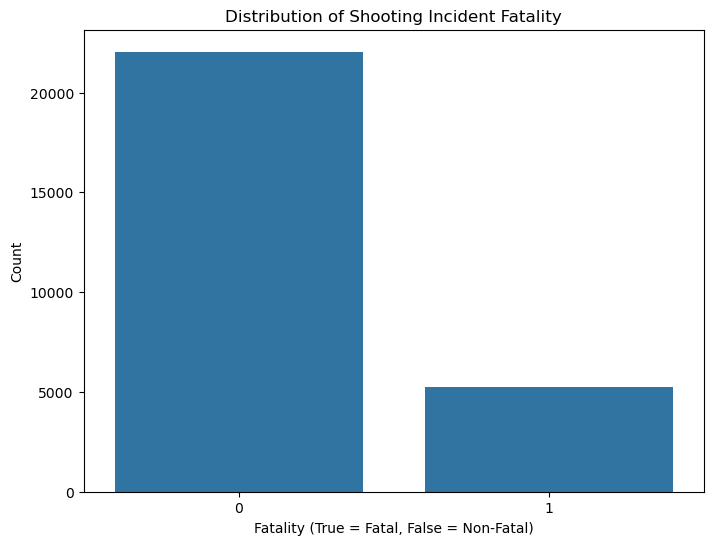

In [285]:
# Plot target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='STATISTICAL_MURDER_FLAG', data=data)
plt.title('Distribution of Shooting Incident Fatality')
plt.xlabel('Fatality (True = Fatal, False = Non-Fatal)')
plt.ylabel('Count')
plt.show()

**Observations**
- The data will likely be imbalanced, because there will be more non-fatal incidents (False) than fatal incidents (True).
- A high imbalance ratio indicates that fatal incidents are rare, and if this is not addressed, this scarcity can impact predictive modeling..

---

## Step 4: Feature Distribution Analysis

**Objective**
To examine the distribution of significant features (e.g., `BORO`, `Hour`, `PERP_RACE`, `VIC_RACE`) and discover any trends.

**Business Importance**
Understanding how incidents are distributed by borough, time, or population demographics will allow for effective targeted policing. For example, figuring out the high risk hours or locations can inform when police patrol will occur.

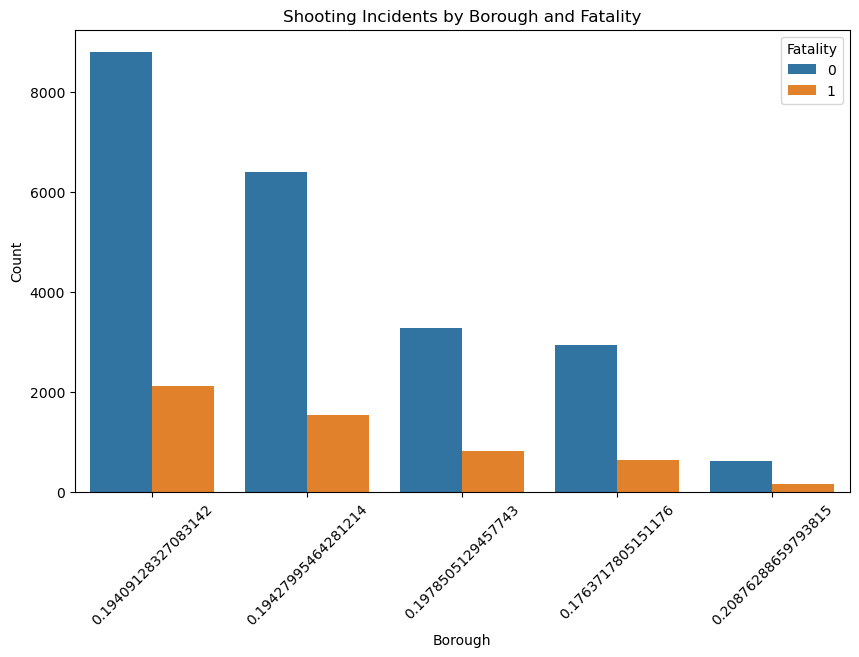

In [286]:
# Distribution of incidents by borough
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO', hue='STATISTICAL_MURDER_FLAG', data=data, order=data['BORO'].value_counts().index)
plt.title('Shooting Incidents by Borough and Fatality')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fatality')
plt.show()

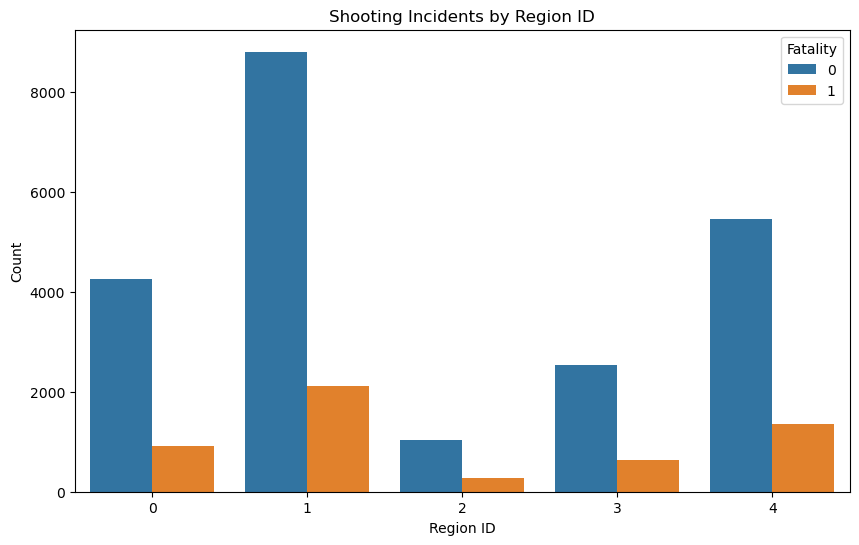

In [287]:
# Distribution of incidents by JURISDICTION CODE
plt.figure(figsize=(10, 6))
sns.countplot(x='Region_ID', hue='STATISTICAL_MURDER_FLAG', data=data)
plt.title('Shooting Incidents by Region ID')
plt.xlabel('Region ID')
plt.ylabel('Count')
plt.legend(title='Fatality')
plt.show()

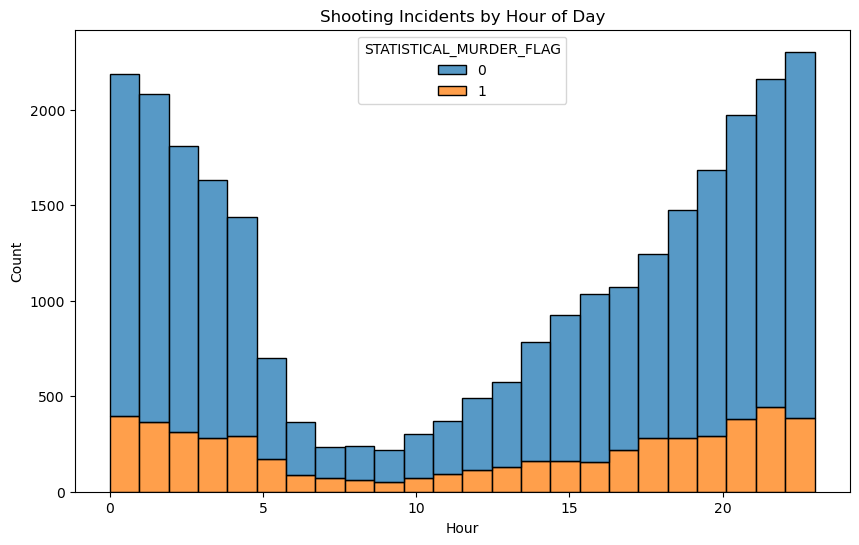

In [288]:
# Distribution of incidents by hour
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Hour', hue='STATISTICAL_MURDER_FLAG', multiple='stack', bins=24)
plt.title('Shooting Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

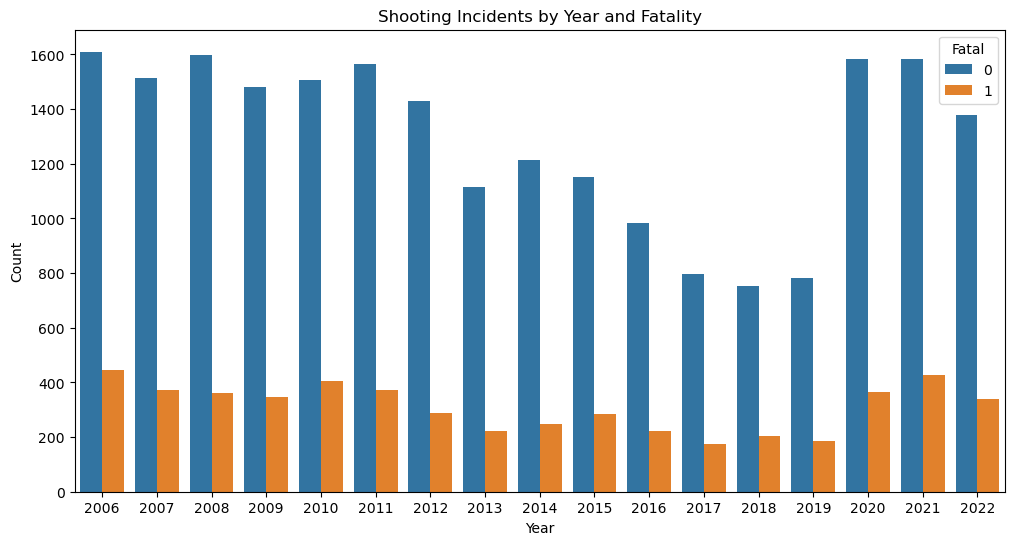

In [289]:
# Yearly Trend
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='STATISTICAL_MURDER_FLAG', data=data)
plt.title('Shooting Incidents by Year and Fatality')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fatal')
plt.show()

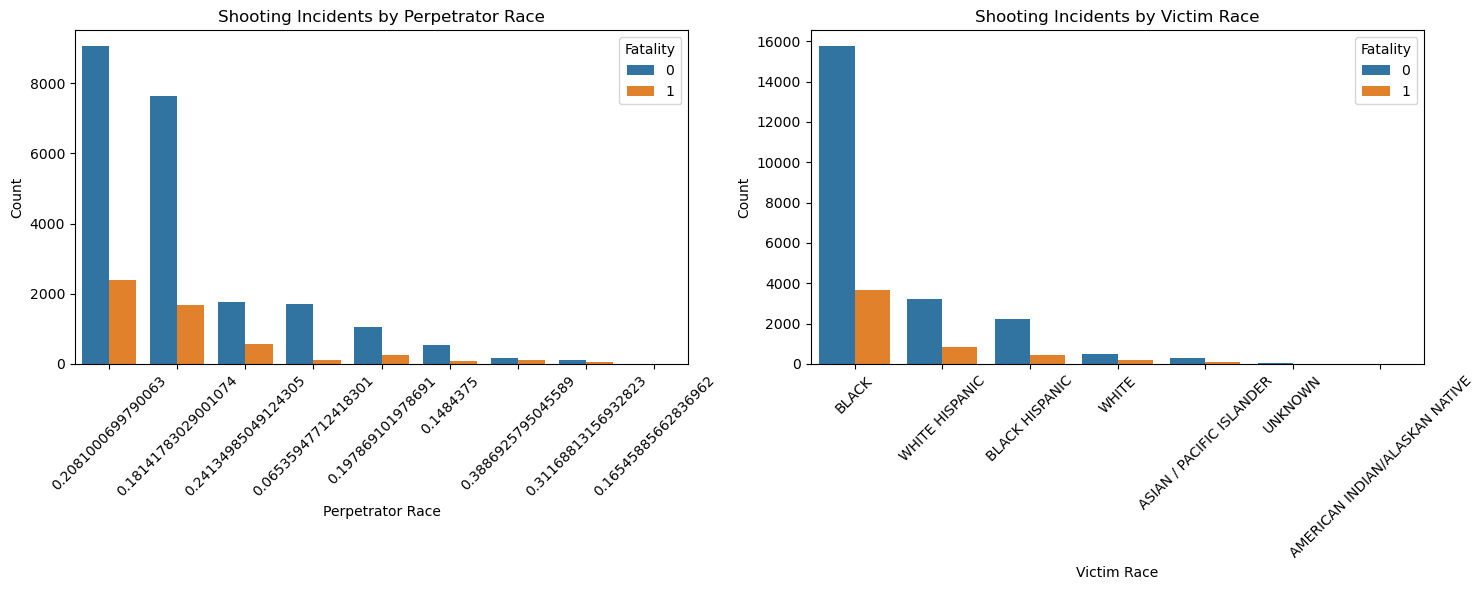

In [290]:
# Distribution of perpetrator and victim race
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='PERP_RACE', hue='STATISTICAL_MURDER_FLAG', data=data, ax=axes[0], order=data['PERP_RACE'].value_counts().index)
axes[0].set_title('Shooting Incidents by Perpetrator Race')
axes[0].set_xlabel('Perpetrator Race')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Fatality')

sns.countplot(x='VIC_RACE', hue='STATISTICAL_MURDER_FLAG', data=data, ax=axes[1], order=data['VIC_RACE'].value_counts().index)
axes[1].set_title('Shooting Incidents by Victim Race')
axes[1].set_xlabel('Victim Race')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Fatality')
plt.tight_layout()
plt.show()

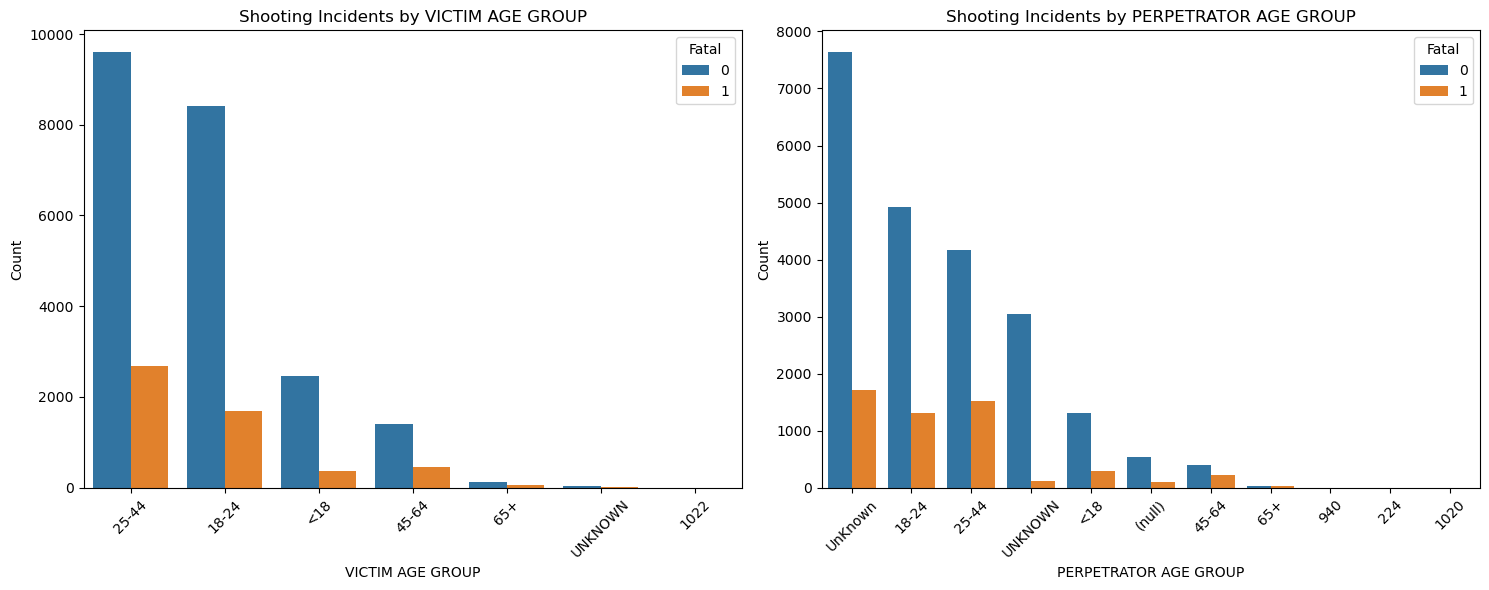

In [291]:
# Distribution of perpetrator and victim age
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='VIC_AGE_GROUP', hue='STATISTICAL_MURDER_FLAG', data=data, ax=ax[0],order=data['VIC_AGE_GROUP'].value_counts().index)
ax[0].set_title('Shooting Incidents by VICTIM AGE GROUP')
ax[0].set_xlabel('VICTIM AGE GROUP')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(title='Fatal')



sns.countplot(x='PERP_AGE_GROUP', hue='STATISTICAL_MURDER_FLAG', data=data, ax=ax[1],order=data['PERP_AGE_GROUP'].value_counts().index)
ax[1].set_title('Shooting Incidents by PERPETRATOR AGE GROUP')
ax[1].set_xlabel('PERPETRATOR AGE GROUP')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Fatal')
plt.tight_layout()
plt.show()


**Observations**
- **Boroughs**: Some boroughs (such as Brooklyn and the Bronx) will have multiple incidents, and a range of fatality rates.
- **Hour**: Incidents can be time based (e.g., late night), including the overall trends of multiple incidents, or all fatal incidents could fall into certain hours.
- **Regions**: Some `Region_ID' clusters combinations could be linked with the highest number of fatal incidents showing clear geographic hotspots.
- **Demographics**: The distributions of perpetrator and victim races can reflect a demographic trend quite nicely; fatal vs non-fatal incidents by demographic distributions.

---

## Step 5: Correlation Analysis

**Objective**
Explore correlations between numeric features to find relationships.

**Business Importance**
Correlations helps identify which features, e.g., `Hour`, `Region_ID`, are correlated with one another or their correlation with the target, can help to scope out features for modeling when assessing which features are correlated, and discover possible multicollinearity.

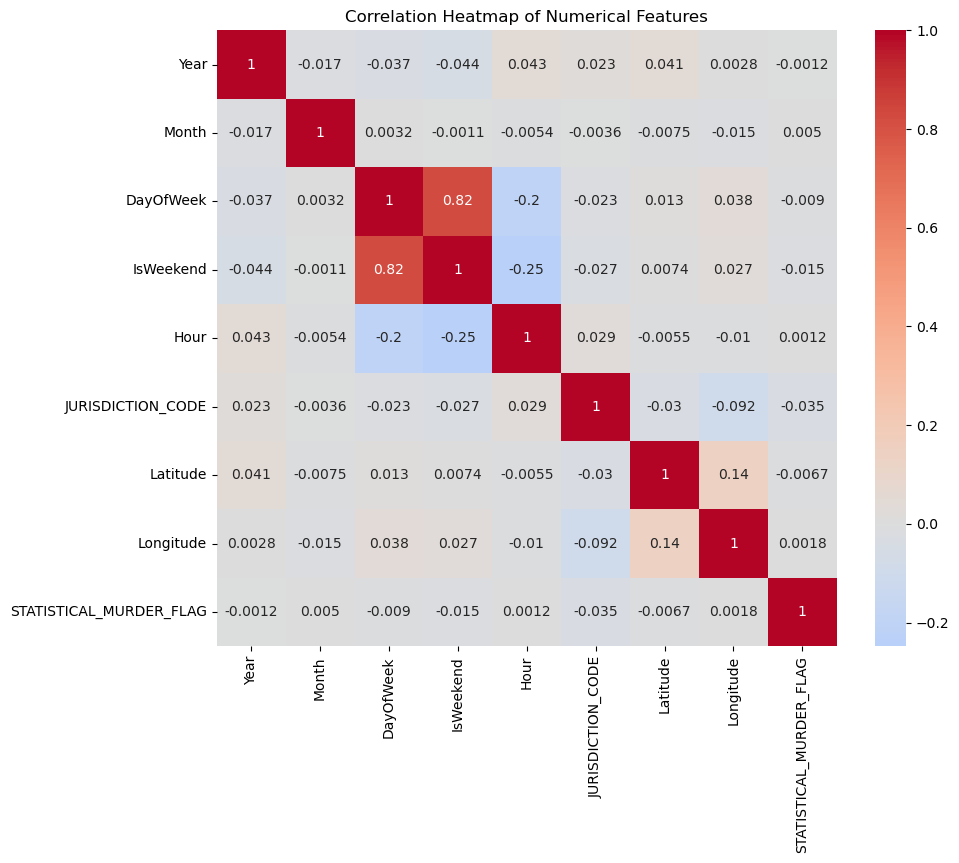

In [292]:
# Correlation heatmap for numerical features
numerical_cols = ['Year', 'Month', 'DayOfWeek', 'IsWeekend', 'Hour', 'JURISDICTION_CODE', 'Latitude', 'Longitude', 'STATISTICAL_MURDER_FLAG']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observations**
- There are strong correlations with 'IsWeekend' and 'Hour',weekends, especially late hours, may see increased social activity or crime, while summer months might correlate with outdoor incidents, slightly elevating fatality risks.
- With weak correlations with `STATISTICAL_MURDER_FLAG`, this may suggest that when using numerical means of analysis alone that cannot sufficiently explain fatality outcomes without categorical analysis too.
---

## Step 6: Chi-Square Test for Categorical Features

**Objective**
Conduct chi-square tests to quantify the probability of an association between categorical variables (`BORO`, `PERP_RACE`, `VIC_RACE`, `LOCATION_DESC`) and the dependent variable.

**Business Importance**
An insignificant association (p-value > 0.05) will allow NYCDS to demonstrate that certain categories (e.g., a particular borough) have no meaningful demographic link regarding fatality rates, thus indicating future areas to best allocate resources and prioritize interventions.

In [293]:
# Chi-square test for categorical features
categorical_cols = ['BORO', 'PERP_RACE', 'VIC_RACE', 'LOCATION_DESC']
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['STATISTICAL_MURDER_FLAG'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col}:")
    print(f"  Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print(f"  Significant association between {col} and fatality (p < 0.05)")
    else:
        print(f"  No significant association between {col} and fatality (p >= 0.05)")

Chi-Square Test for BORO:
  Chi2 Statistic: 8.36, p-value: 0.0791
  No significant association between BORO and fatality (p >= 0.05)
Chi-Square Test for PERP_RACE:
  Chi2 Statistic: 344.55, p-value: 0.0000
  Significant association between PERP_RACE and fatality (p < 0.05)
Chi-Square Test for VIC_RACE:
  Chi2 Statistic: 67.95, p-value: 0.0000
  Significant association between VIC_RACE and fatality (p < 0.05)
Chi-Square Test for LOCATION_DESC:
  Chi2 Statistic: 436.49, p-value: 0.0000
  Significant association between LOCATION_DESC and fatality (p < 0.05)


**Observations**
- A low p-value (< 0.05) for a feature like `BORO` suggests that some boroughs are significantly related to fatal events. 
- Non-significant features might still be valuable when together with other features in predictive models

---

## Step 7: Geographic Visualization

**Objective**
Map shooting events on a scatterplot of `Latitude` and `Longitude`, using `STATISTICAL_MURDER_FLAG` to color their points.

**Business Importance**
Geographically based visualizations, often called "heatmaps", demonstrate where crimes are concentrated (known hotspots) and how many are fatal (murder flag). Policymakers can make better resource allocations in areas of highest risk to law enforcement agencies in their detection, arrest, and charging of people who commit violent crimes.

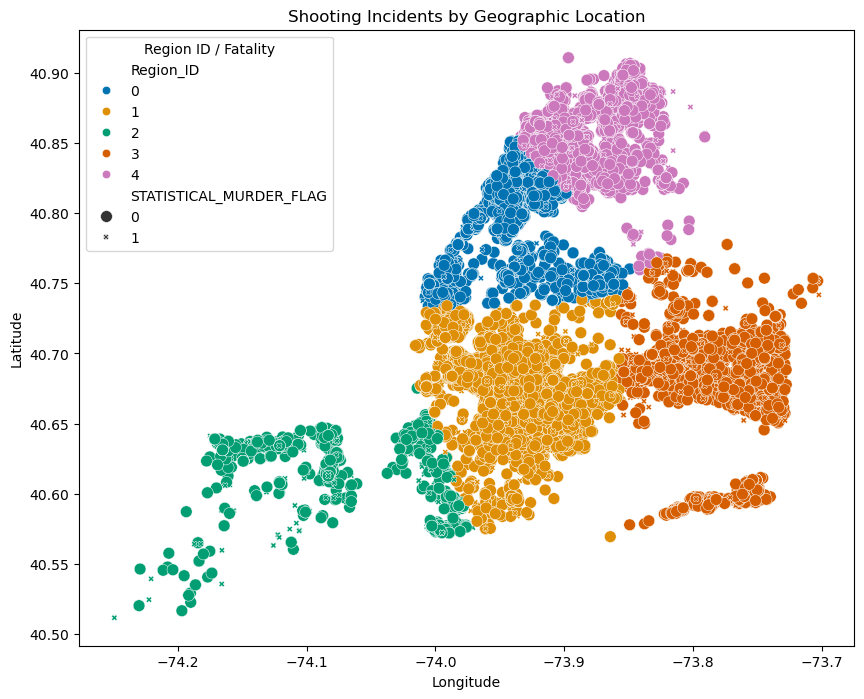

In [296]:
# Scatter plot of incidents by location
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Region_ID', style='STATISTICAL_MURDER_FLAG', size='STATISTICAL_MURDER_FLAG', data=data, palette='colorblind')
plt.title('Shooting Incidents by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Region ID / Fatality')
plt.show()

**Observations**
- Clusters of incidents at the same geographic area could suggest crime hot spots. 
- Fatal incidents can be used to pinpoint proactive/predictive policing strategies around, and for, targeted patrols. 
---

## Step 8: Key Insights and Recommendations

### Summary of Findings
- **Class Imbalance**: In the dataset, it is likely that there is some imbalance in the dataset as there are significantly more non-fatal incidents than fatal, indicating that the modeling could shift to become biased toward the non-fatal predictions.
- **Boroughs**: Cities and boroughs (e.g., Brooklyn, Bronx) that see incidents may see asymmetrical incident counts, which vary in fatality rates, indicating specific areas for policing was used to enforce stop and cease violence in the area. 
- **Temporal Patterns**: Incidents, whether fatal or not deadly, certainly show temporal patterns allowing for district policing strategies to be formed in high incident times for the clearance, recovery and other policing strategies.
- **Geographic Patterns**: Most significantly shows geographic concentrations; with some JURISDICTION CODE showing higher rates of issues classified by fatality.
- **Demographics**: The distributions of Race for perpetrators and victims show some demographic trends of fatal incidents and could prominently inform community outreach programs. 
- **Statistical Tests**: Chi-square tests were observed as to test the relationship of categorical features (e.g., `BORO`) to fatality, with, at minimum, some (acceptable) key features.

### Business Recommendations
- **Planning and Resource Allocation** - More patrols in high-risk boroughs and regions that have been identified by `Region_ID` during peak times (i.e. late night).
- **Community Engagement** - Leverage demographic data to develop outreach in higher incidence demographics and communities. 
- **Data-informed policing** - Exploit the time-of-day and geographic patterns to plan patrols and prevention.
- **Additional Analyses** - Incorporate other relevant data (e.g. socioeconomic) to gain further insights into the reasons for fatalities.